# Beamline

This is an example of plotting lines and surveys.
First, create a simple line and a tracker:

In [1]:
%load_ext autoreload
%autoreload 2

import xtrack as xt
import xpart as xp
import xplt
import numpy as np

xplt.apply_style()

np.random.seed(36963142)

In [2]:
## Generate a simple 6-fold symmetric FODO lattice

n = 6  # number of sections
elements = {
    "QF": xt.Quadrupole(length=0.3, k1=0.63 / 0.3),
    "QD": xt.Quadrupole(length=0.3, k1=-0.48 / 0.3),
    "MU": xt.Bend(length=0.5, knl=[np.pi / n], h=np.pi / n / 0.5),
}
parts = {
    "a": [
        xt.Node(0.7, "QF"),
        xt.Node(1.4, "MU"),
        xt.Node(2.1, "QD"),
        xt.Node(2.8, "MU"),
    ],
    "b": [
        xt.Node(2.2, "MU"),
        xt.Node(2.9, "QD"),
        xt.Node(3.6, "MU"),
        xt.Node(4.3, "QF"),
    ],
}
nodes = [xt.Node(5.0 * i, "a" if i % 2 else "b", name=f"S{i+1}") for i in range(n)]

# sextupoles
for i in range(n):
    sx = xt.Sextupole(length=0.2, k2=0.5 * np.sin(2 * np.pi * (i / n)))
    nodes.append(xt.Node(0.2, sx, from_=f"S{i+1}", name=f"S{i+1}SX"))

line = xt.Line.from_sequence(
    nodes, length=5.0 * n, sequences=parts, elements=elements, auto_reorder=True
)
line.particle_ref = xp.Particles()
line.build_tracker()


## Generate a second line with horizontal and vertical bends

env = xt.Environment()
env.new("bend_v", "Bend", rot_s_rad=np.pi / 2)
env.new("quad", "Quadrupole", length=0.3)
env.new("sext", "Sextupole", length=0.2)
env.new("oct", "Octupole", length=0.1)

line2 = env.new_line(
    components=[
        env.new("mb1", "Bend", angle=np.pi / 6, length=1, at=5),
        env.place(["quad", "sext"]),
        env.new("mb2", "Bend", angle=-np.pi / 6, length=1, at=10),
        env.place(["quad", "sext"]),
        env.new("mbv1", "bend_v", angle=np.pi / 4, length=1, at=15),
        env.place(["quad", "oct"]),
        env.new("mbv2", "bend_v", angle=-np.pi / 4, length=1, at=20),
        env.place(["quad", "oct"]),
        env.new("ev", "Marker", at=25),
    ]
)

## Survey

Create a survey and a default floor plan plot:

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


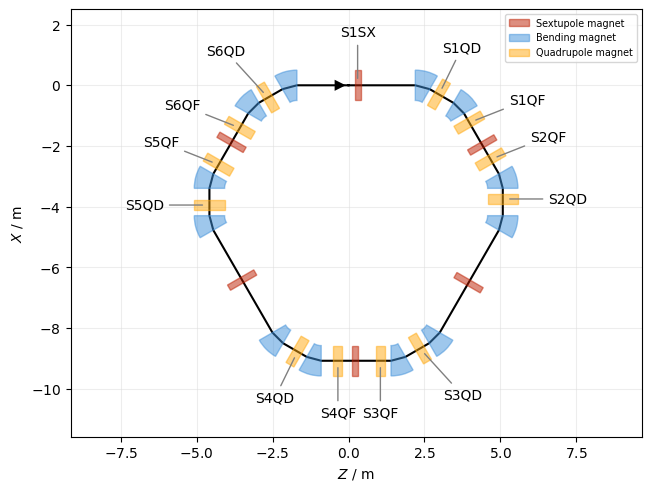

In [3]:
survey = line.survey()
plot = xplt.FloorPlot(survey, labels=["S.Q.", "S1SX"])
plot.legend()

Customize the plot:

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


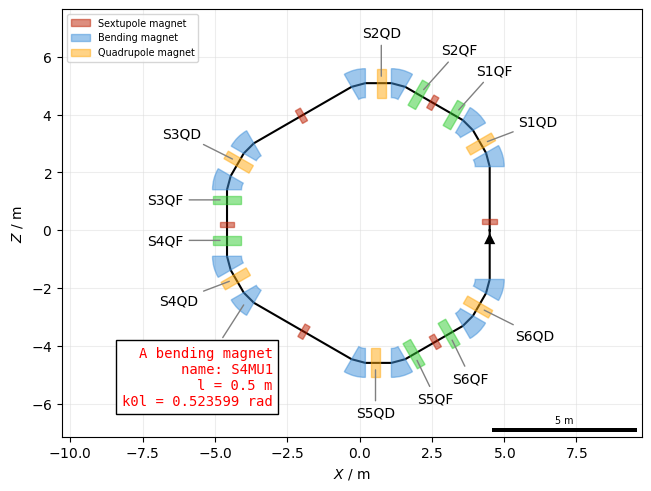

In [4]:
plot = xplt.FloorPlot(
    line.survey(X0=4.5),
    projection="XZ",
    #
    # Adjust box style for element names matching regex
    #
    # default_boxes=False,  # use this to show *only* the boxes defined below (hiding the default elements)
    boxes={
        "S.QF": dict(color="limegreen"),
        "S.QD": True,  # default style for defocussing quads
        "S.SX": dict(width=0.5),
    },
    #
    # Adjust labels for element names matching regex
    #
    labels={
        "S.Q.": True,  # default labels
        "S4MU1": dict(
            text=(
                "A bending magnet\n"
                "name: {name}\n"
                "l = {length} m\n"
                "k0l = {element.knl[0]:g} rad"
            ),
            xytext=(-3, -4),
            bbox={"fc": "white"},
            font="monospace",
            c="red",
        ),
    },
    line=line,  # optional, here we need it only to access it in the custom label of S4MU1
)
plot.add_scale()
plot.legend(loc="upper left")

Different projections are also supported. In this example we have a line with a horizontal and vertical chicane:

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


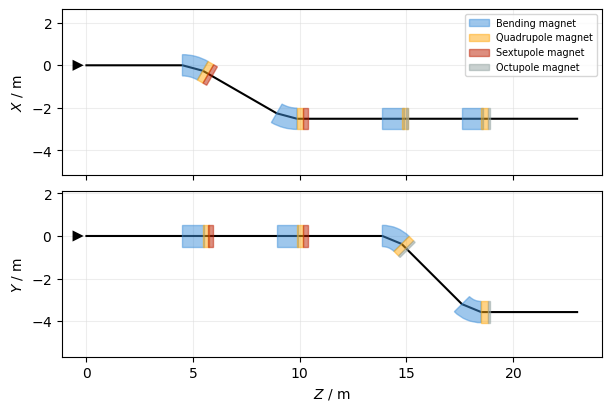

In [5]:
fig, ax = xplt.mpl.pyplot.subplots(2, figsize=(6, 4), sharex=True)

# First the default ZX projection, second the ZY projection
survey = line2.survey()
xplt.FloorPlot(survey, ax=ax[0])
xplt.FloorPlot(survey, projection="ZY", ax=ax[1])

ax[0].legend()
ax[0].set(xlabel=None);

## Multipole strength

A plot of the multipole strength $k_nl$ as function of s-coordinate:

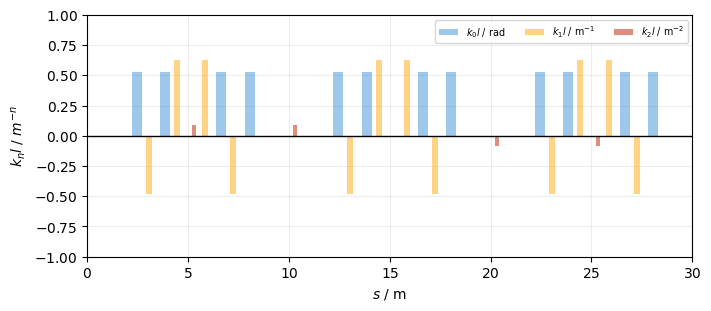

In [6]:
plot = xplt.KnlPlot(line, figsize=(7, 3))
plot.ax.set(ylim=(-1, 1));

The usual subplot spec string is also supported:

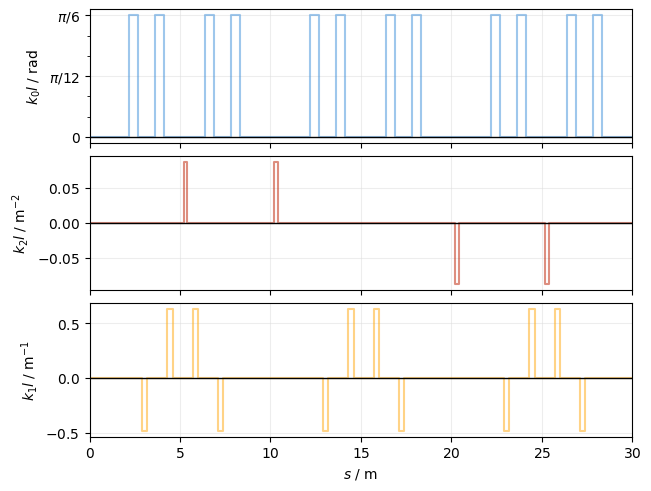

In [7]:
plot = xplt.KnlPlot(line, knl="k0l,k2l,k1l", filled=False)

-----------------
```{seealso}
- {class}`xplt.line`
```